# EDA of Titanic Dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
titanic = sns.load_dataset('titanic')
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Heatmap

In [0]:
plt.style.use('ggplot')

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

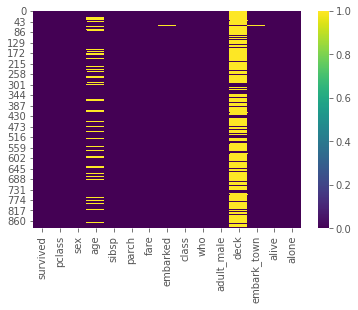

In [7]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = True)

In [8]:
corrmat = titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


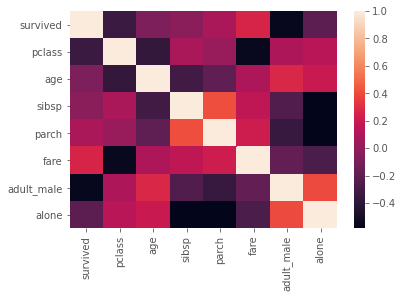

In [9]:
sns.heatmap(corrmat)

## Univariate Analysis

In [10]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


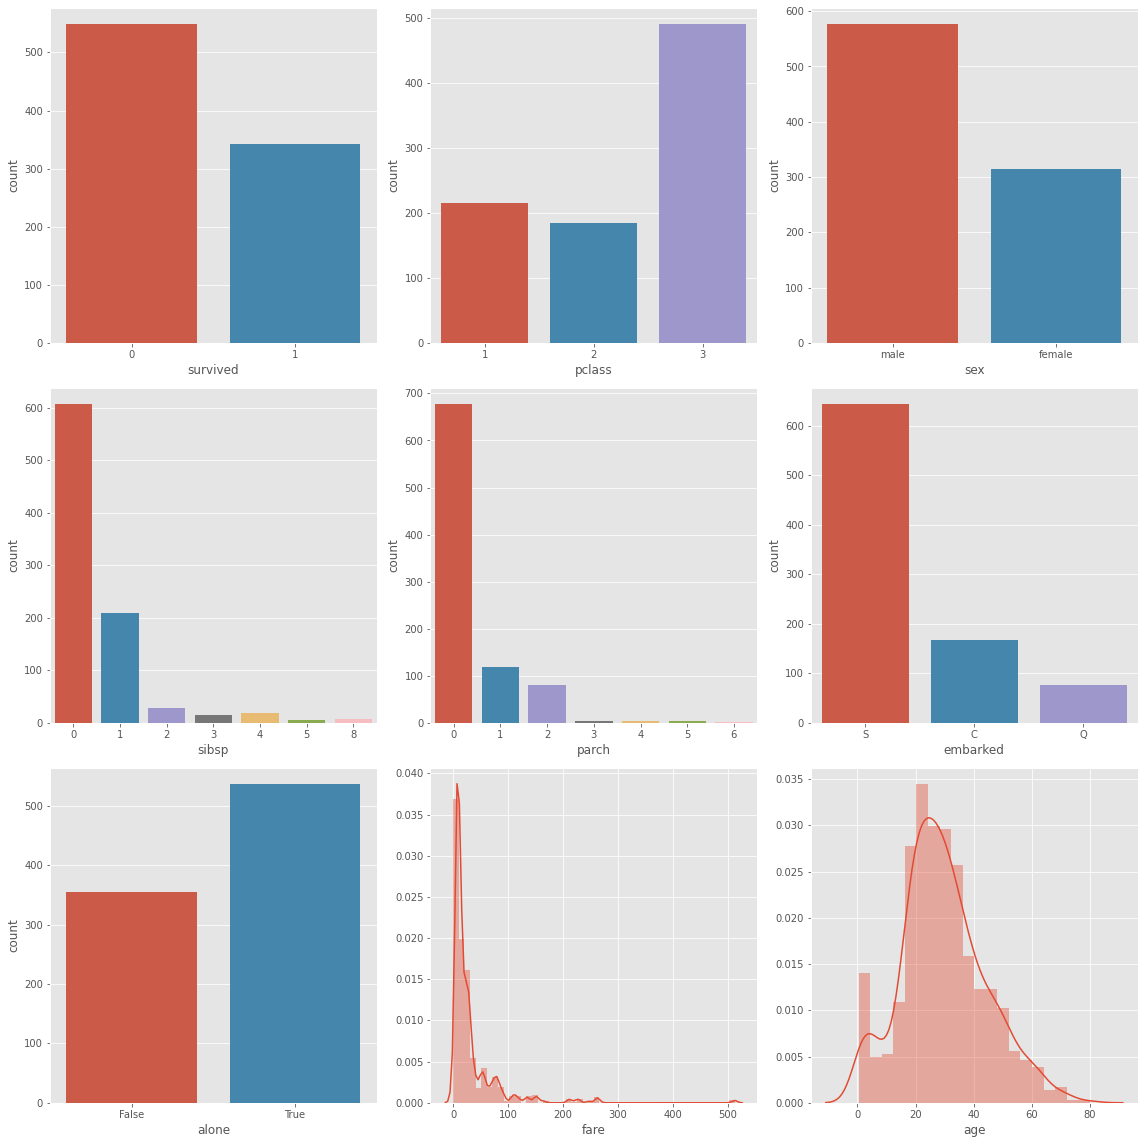

In [11]:

fig, ax = plt.subplots(3, 3, figsize = (16, 16))

sns.countplot('survived', data = titanic, ax = ax[0][0])
sns.countplot('pclass', data = titanic, ax = ax[0][1])
sns.countplot('sex', data = titanic, ax = ax[0][2])
sns.countplot('sibsp', data = titanic, ax = ax[1][0])
sns.countplot('parch', data = titanic, ax = ax[1][1])
sns.countplot('embarked', data = titanic, ax = ax[1][2])
sns.countplot('alone', data = titanic, ax = ax[2][0])

sns.distplot(titanic['fare'], kde = True, ax = ax[2][1])

t_age = titanic['age']
t_age = t_age.apply (pd.to_numeric, errors='coerce')
t_age = t_age.dropna()
sns.distplot(t_age, kde = True, ax = ax[2][2])
plt.tight_layout()


## PClass

In [12]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [13]:
titanic.groupby(['pclass', 'survived'])['pclass'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: pclass, dtype: int64

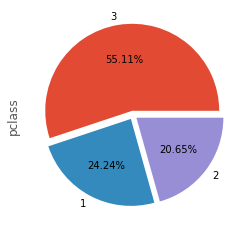

In [14]:
explode = [0.05, 0.05,0.05]
titanic['pclass'].value_counts().plot.pie(explode = explode, autopct = '%1.2f%%')

## Sex

In [15]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

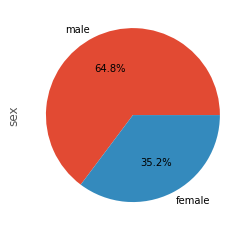

In [16]:
titanic['sex'].value_counts().plot.pie(autopct = '%1.1f%%')

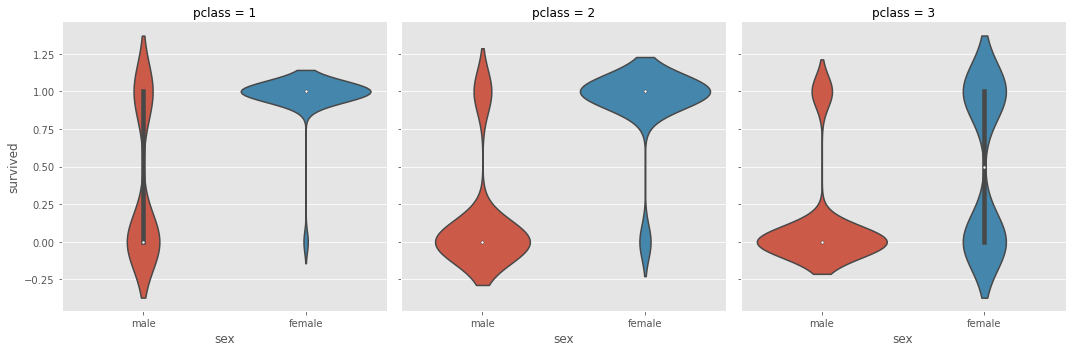

In [17]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = titanic, col = 'pclass')

## Age

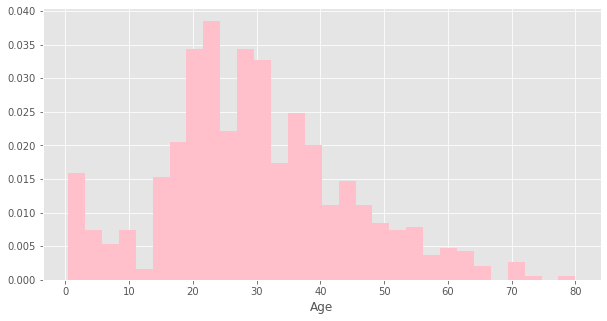

In [18]:
titanic['age'].hist(bins = 30, density = True, color = 'pink', figsize = (10, 5))
plt.xlabel('Age')
plt.show()

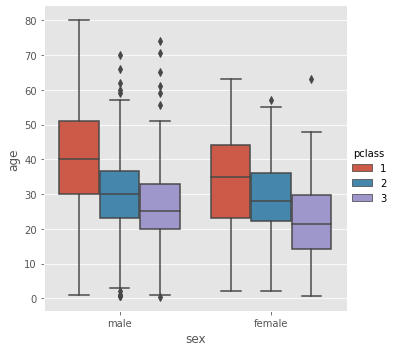

In [19]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', hue = 'pclass')

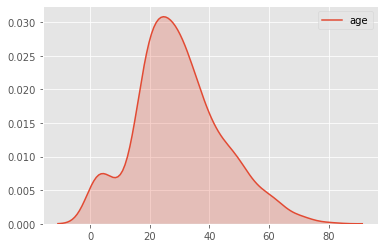

In [20]:
sns.kdeplot(titanic['age'], shade = True)

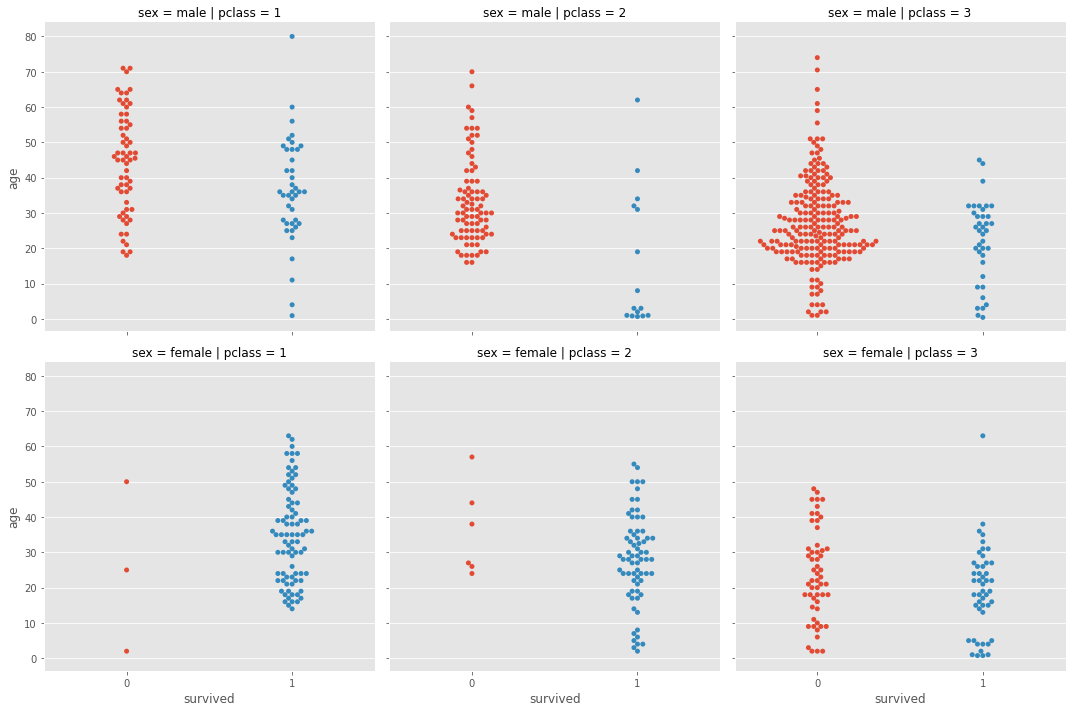

In [21]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', row = 'sex', col = 'pclass')

## Fare


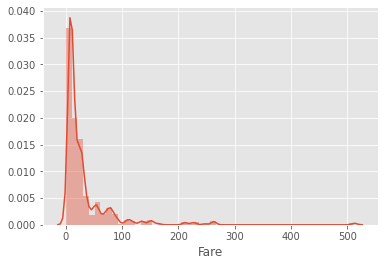

In [22]:
sns.distplot(titanic['fare'])
plt.xlabel('Fare')
plt.show()

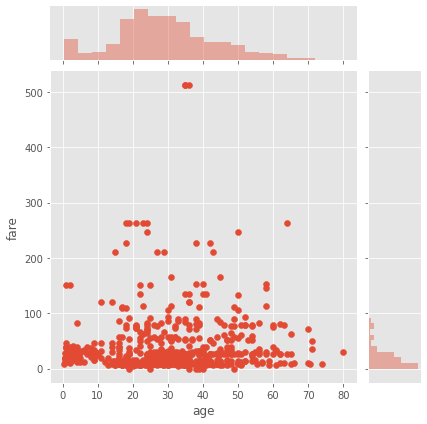

In [23]:
sns.jointplot(x = 'age', y = 'fare', data = titanic)

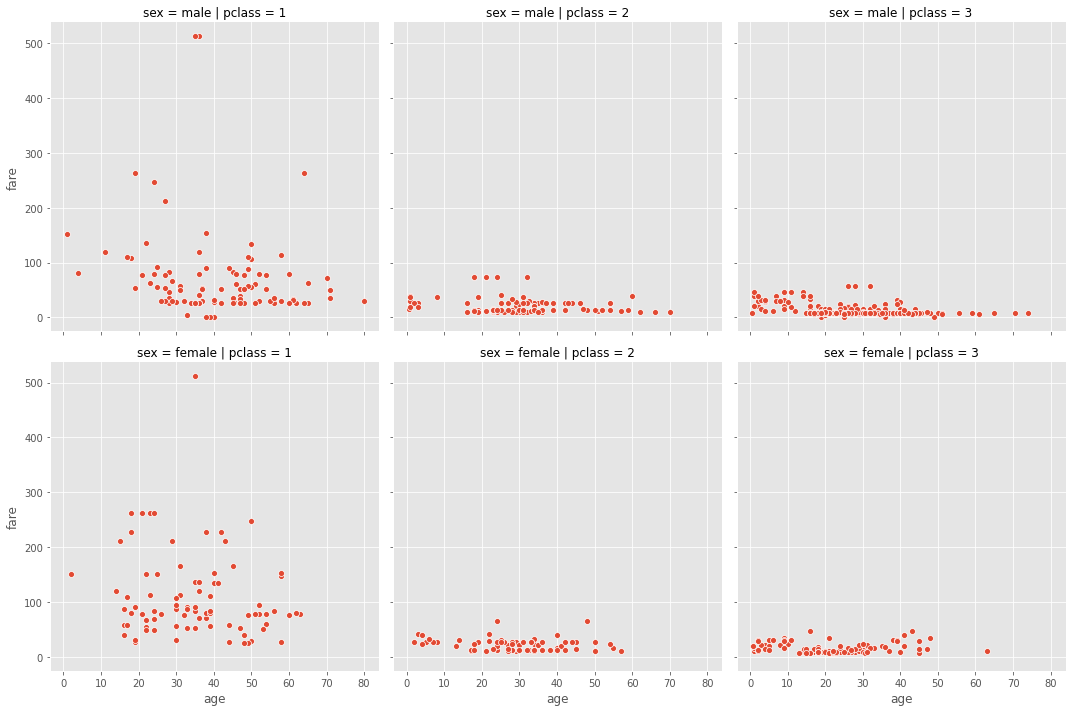

In [24]:
sns.relplot(x = 'age', y = 'fare', data = titanic, row = 'sex', col = 'pclass')

## SibSp

In [25]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

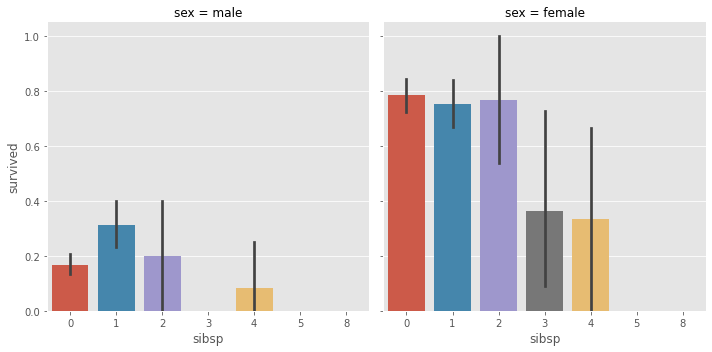

In [26]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

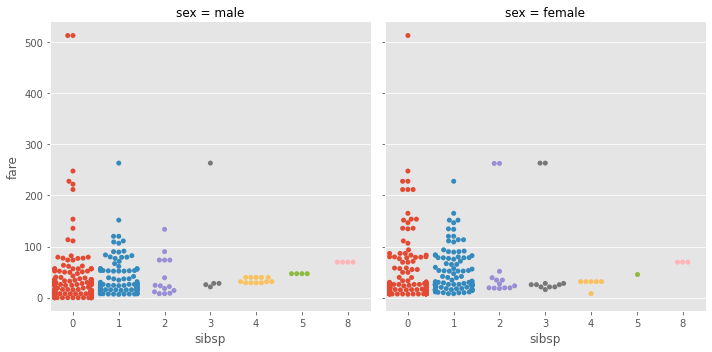

In [27]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'sex')

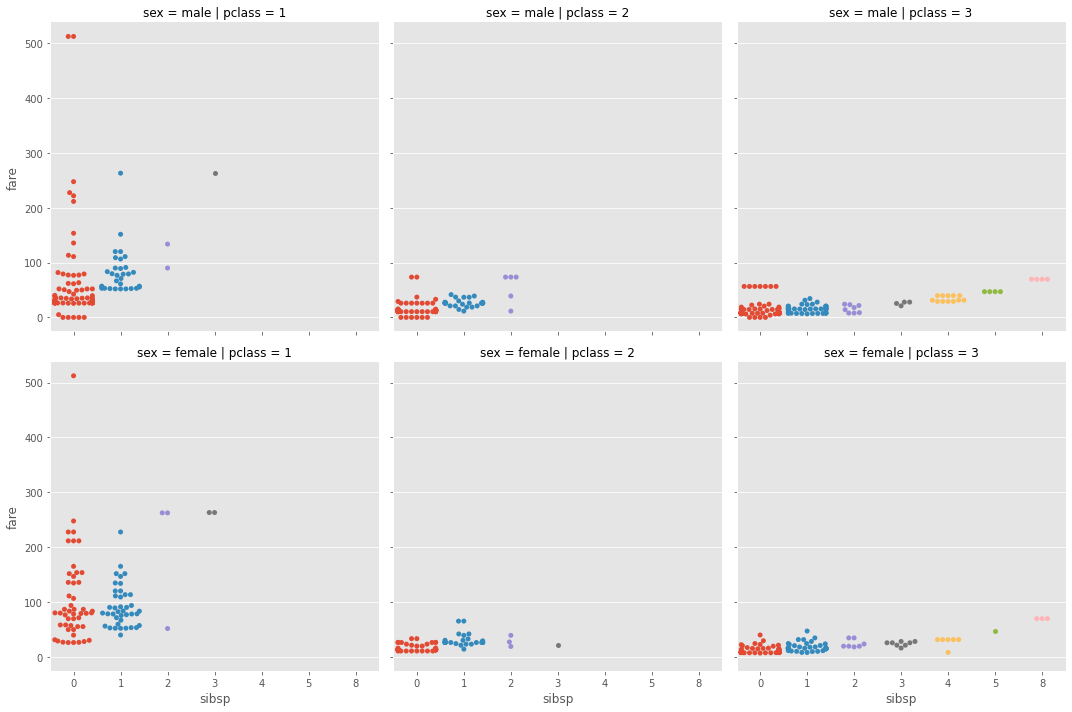

In [28]:
sns.catplot(x = 'sibsp', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex')

## Parch

In [29]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

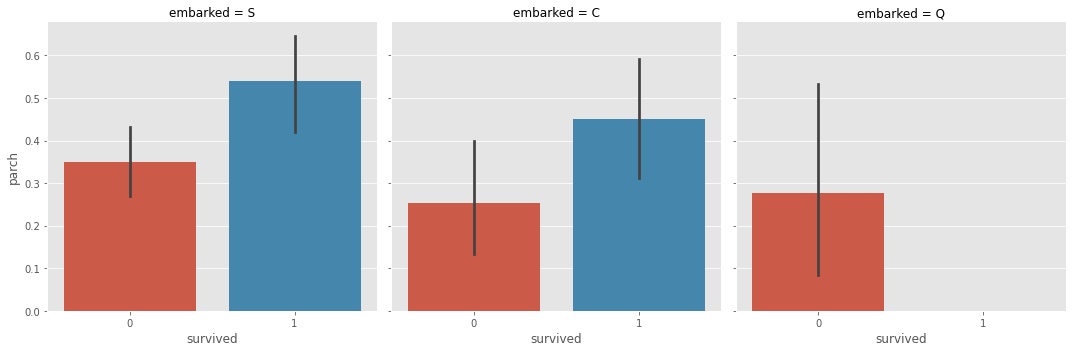

In [30]:
sns.catplot(x = 'survived', y = 'parch', data = titanic, kind = 'bar', col = 'embarked')

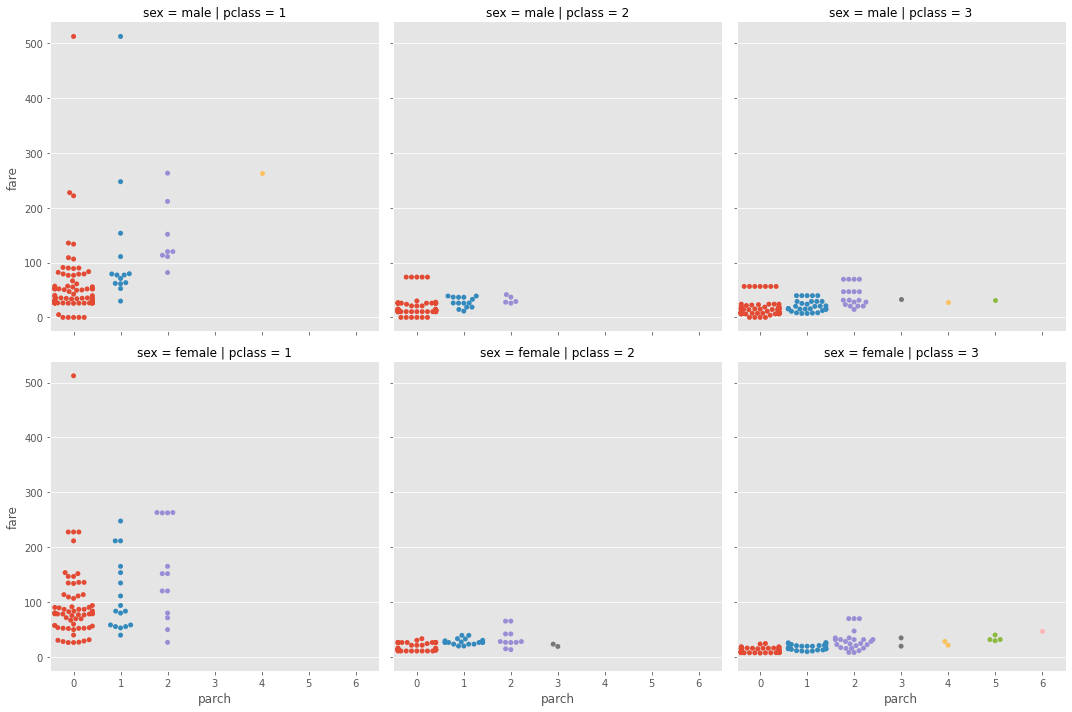

In [31]:
sns.catplot(x = 'parch', y = 'fare', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex')

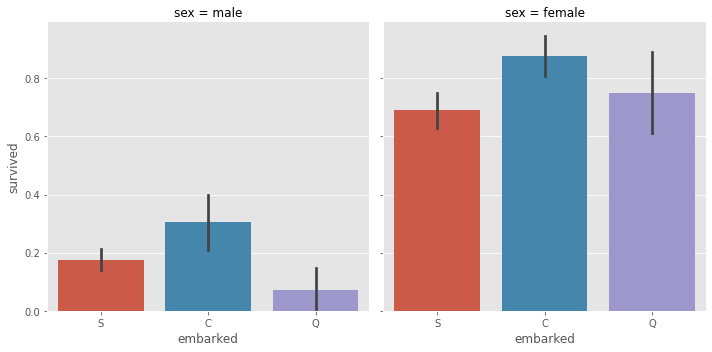

In [32]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, col = 'sex')

In [33]:
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

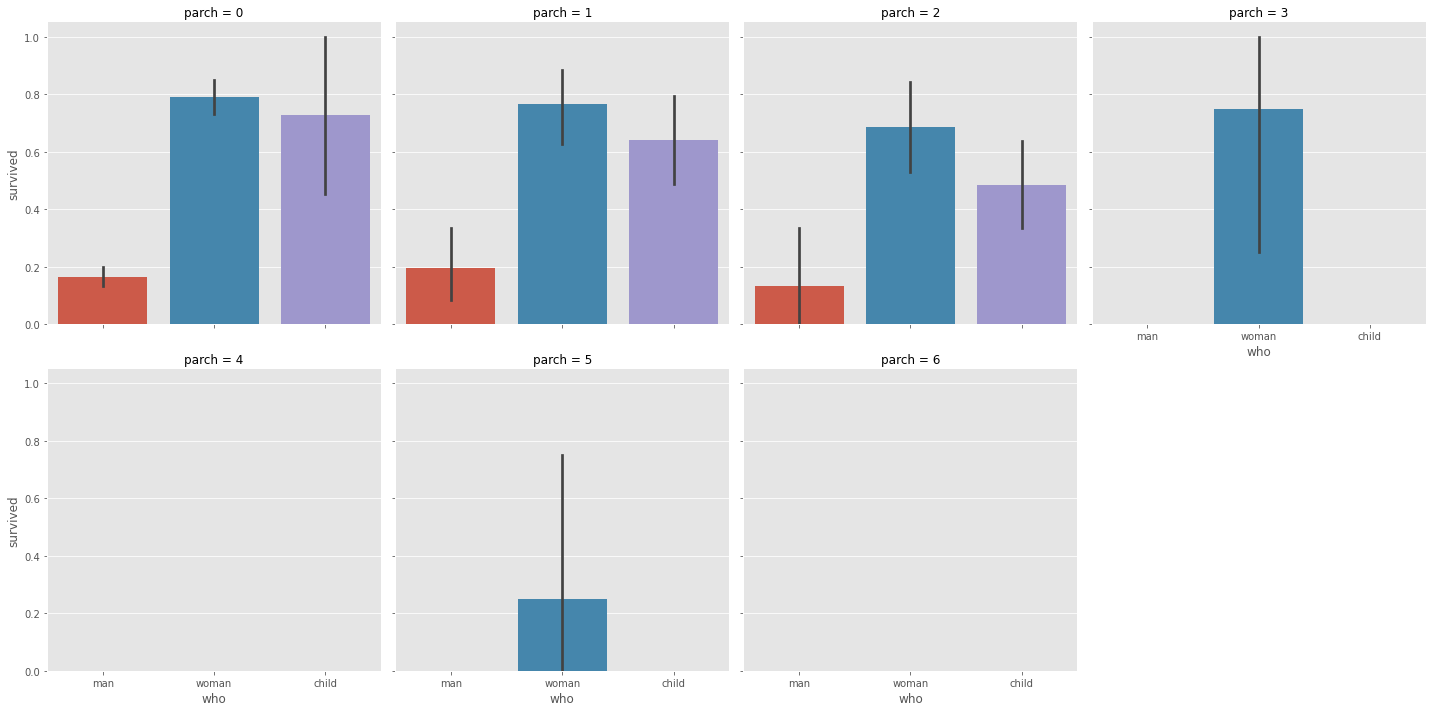

In [34]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, col = 'parch', col_wrap=4)

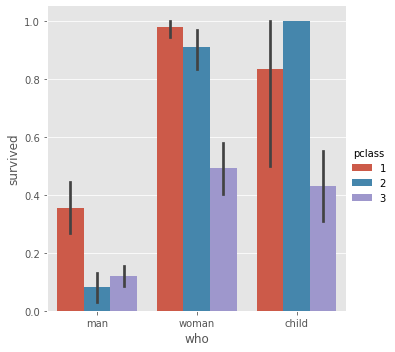

In [35]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')